# Adicionando Colunas, Modificando Colunas e Valores

### Vamos pegar o nosso dataframe novamente

In [1]:
import pandas as pd
#importando os arquivos
vendas_df = pd.read_csv(r'Contoso - Vendas  - 2017.csv', sep=';')
produtos_df = pd.read_csv(r'Contoso - Cadastro Produtos.csv', sep=';')
lojas_df = pd.read_csv(r'Contoso - Lojas.csv', sep=';')
clientes_df = pd.read_csv(r'Contoso - Clientes.csv', sep=';')

#limpando apenas as colunas que queremos
clientes_df = clientes_df[['ID Cliente', 'E-mail']]
produtos_df = produtos_df[['ID Produto', 'Nome do Produto']]
lojas_df = lojas_df[['ID Loja', 'Nome da Loja']]

#mesclando e renomeando os dataframes
vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente').rename(columns={'E-mail': 'E-mail do Cliente'})
display(vendas_df.head())

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do Cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1,SV DVD 55DVD Storage Binder M56 Black,Loja Contoso North America Reseller,cshawd4@technorati.com
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1,"The Phone Company Touch Screen Phones 26-2.2"" ...",Loja Contoso Tehran No.2,kgorriekd@bandcamp.com
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1,Contoso Touch Screen Phones - CRT M11 Black,Loja Contoso Singapore,angela49@adventure-works.com
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1,Contoso SLR Camera M146 Orange,Loja Contoso Grand Prairie,jacob4@adventure-works.com


In [4]:
# Agrupa os dados por 'Nome da Loja' e soma os valores numéricos
vendas_lojas = vendas_df.groupby('Nome da Loja').sum()
vendas_lojas = vendas_lojas[['Quantidade Vendida']]

# Exibe as primeiras linhas do DataFrame resultante
display(vendas_lojas.head())


,Quantidade Vendida
Nome da Loja,
Loja Contoso Albany,26353
Loja Contoso Alexandria,26247
Loja Contoso Amsterdam,28294
Loja Contoso Anchorage,27451
Loja Contoso Annapolis,26065


<Axes: xlabel='Nome da Loja'>

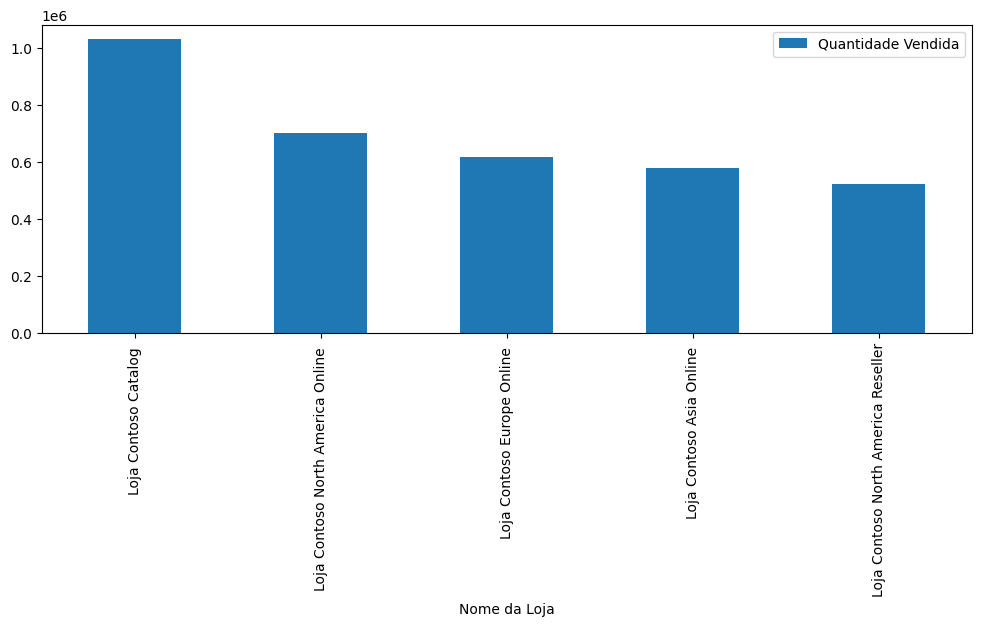

In [7]:
#ORDENAR
vendas_lojas = vendas_lojas.sort_values('Quantidade Vendida',ascending=False)
vendas_lojas[:5].plot(figsize=(12,4),kind='bar')

### Agora, e se quisermos acrescentar uma coluna com o mês, o dia e o ano de cada venda (e não só a data completa)

In [30]:
vendas_df['Data da Venda'] = pd.to_datetime(vendas_df['Data da Venda'],format='%d/%m/%Y')
vendas_df['Ano da venda'] = vendas_df['Data da Venda'].dt.year
vendas_df['Mes da venda'] = vendas_df['Data da Venda'].dt.month
vendas_df['Dia da venda'] = vendas_df['Data da Venda'].dt.day
display(vendas_df.head())

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do Cliente,Ano da venda,Mes da venda,Dia da venda
0,1,2017-01-01,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp,2017,1,1
1,2,2017-01-01,06/01/2017,5,308,1586,2,18469,9,1,SV DVD 55DVD Storage Binder M56 Black,Loja Contoso North America Reseller,cshawd4@technorati.com,2017,1,1
2,3,2017-01-01,01/01/2017,0,294,1444,5,19730,13,1,"The Phone Company Touch Screen Phones 26-2.2"" ...",Loja Contoso Tehran No.2,kgorriekd@bandcamp.com,2017,1,1
3,4,2017-01-01,01/01/2017,0,251,1468,5,29326,6,1,Contoso Touch Screen Phones - CRT M11 Black,Loja Contoso Singapore,angela49@adventure-works.com,2017,1,1
4,5,2017-01-01,07/01/2017,6,94,1106,2,22617,4,1,Contoso SLR Camera M146 Orange,Loja Contoso Grand Prairie,jacob4@adventure-works.com,2017,1,1


### E agora, caso a gente queira modificar 1 valor específico, como fazemos? Vamos importar novamente a base de produtos

In [18]:
import pandas as pd
novo_produtos_df = pd.read_csv(r'Contoso - Cadastro Produtos.csv', sep=';')
display(novo_produtos_df.head())
#repare no .head() para pegar apenas os primeiros valores, é bem comum esse uso para ter uma visão do que são os dados

,Nome do Produto,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,ID Subcategoria
0,Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econômico,"10,69","20,96",873,22
1,Contoso Optical Wheel OEM PS/2 Mouse E60 Grey,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,879,22
2,Contoso Optical Wheel OEM PS/2 Mouse E60 Black,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,880,22
3,Contoso Optical Wheel OEM PS/2 Mouse E60 White,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,881,22
4,Contoso Optical Wheel OEM PS/2 Mouse E60 Silver,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,882,22


### Antes de entrar no próximo exemplo, precisamos falar de 2 métodos:
    1. loc - permite pegar uma linha de acordo com o índice dela. Ele dá erro caso não encontre o índice. Isso é interessante principalmente quando o índice é uma informação relevante ao invés só do número do índice ou quando queremos pegar alguma linha específica do dataframe (ao invés de ir do início do dataframe até a linha 5, por exemplo).
        Também podemos usar como loc[índice_linha, índice_coluna] para acessar um valor específico e modificá-lo.
    2. iloc - enxerga o dataframe como linhas e colunas e consegue pegar o valor com um número de linha e um número de coluna. Repara que ele não analisa o valor do índice da linha e da coluna, apenas a posição importa.
        Uso: iloc[num_linha, num_coluna]
        
- Vendo na prática

In [21]:
novo_produtos_df = novo_produtos_df.set_index('Nome do Produto')
display(novo_produtos_df.head())

,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,ID Subcategoria
Nome do Produto,,,,,,,,
Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econômico,"10,69","20,96",873,22
Contoso Optical Wheel OEM PS/2 Mouse E60 Grey,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,879,22
Contoso Optical Wheel OEM PS/2 Mouse E60 Black,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,880,22
Contoso Optical Wheel OEM PS/2 Mouse E60 White,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,881,22
Contoso Optical Wheel OEM PS/2 Mouse E60 Silver,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,882,22


In [26]:
#vamos pegar o preço produto Contoso Optical Wheel OEM PS/2 Mouse E60 Black
#por loc
print(novo_produtos_df.loc['Contoso Optical Wheel OEM PS/2 Mouse E60 Black', 'Preco Unitario'])
#por iloc
print(novo_produtos_df.iloc[2,5])


13
13


### A empresa decidiu aumentar o preço do produto ID 873 (Contoso Wireless Laser Mouse E50 Grey) para 23 reais. Como fazemos, para modificar isso na nossa base?

In [31]:

novo_produtos_df.loc['Contoso Wireless Laser Mouse E50 Grey','Preco Unitario'] = 23
display(novo_produtos_df.head())


,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,ID Subcategoria
Nome do Produto,,,,,,,,
Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econômico,"10,69",23,873,22
Contoso Optical Wheel OEM PS/2 Mouse E60 Grey,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,879,22
Contoso Optical Wheel OEM PS/2 Mouse E60 Black,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,880,22
Contoso Optical Wheel OEM PS/2 Mouse E60 White,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,881,22
Contoso Optical Wheel OEM PS/2 Mouse E60 Silver,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,882,22
